## Visualisation of new daily COVID-19 cases worldwide

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
from pylab import rcParams
%matplotlib inline

In [42]:
# Loading data from the European Centre for Disease Prevention and Control
df_europ = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv', parse_dates=['dateRep'])
df_europ.head()

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-03-06    3      6  2020    759       5             Afghanistan    AF   
1 2020-02-06    2      6  2020    545       8             Afghanistan    AF   
2 2020-01-06    1      6  2020    680       8             Afghanistan    AF   
3 2020-05-31   31      5  2020    866       3             Afghanistan    AF   
4 2020-05-30   30      5  2020    623      11             Afghanistan    AF   

  countryterritoryCode  popData2018 continentExp  
0                  AFG   37172386.0         Asia  
1                  AFG   37172386.0         Asia  
2                  AFG   37172386.0         Asia  
3                  AFG   37172386.0         Asia  
4                  AFG   37172386.0         Asia

In [43]:
# Create custom Date column in year-month-day format using individual columns
df_europ['Date'] = pd.to_datetime(df_europ[['year', 'month', 'day']])
df_europ.tail()

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
21124 2020-03-25   25      3  2020      0       0                Zimbabwe   
21125 2020-03-24   24      3  2020      0       1                Zimbabwe   
21126 2020-03-23   23      3  2020      0       0                Zimbabwe   
21127 2020-03-22   22      3  2020      1       0                Zimbabwe   
21128 2020-03-21   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2018 continentExp       Date  
21124    ZW                  ZWE   14439018.0       Africa 2020-03-25  
21125    ZW                  ZWE   14439018.0       Africa 2020-03-24  
21126    ZW                  ZWE   14439018.0       Africa 2020-03-23  
21127    ZW                  ZWE   14439018.0       Africa 2020-03-22  
21128    ZW                  ZWE   14439018.0       Africa 2020-03-21

In [44]:
# Check column data types
df_europ.dtypes

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2018                       float64
continentExp                       object
Date                       datetime64[ns]
dtype: object

In [47]:
# Inspect df with random sample
df_europ.sample(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
19325 2020-05-25   25      5  2020      8       0                    Togo   
13003 2020-01-31   31      1  2020      0       0                  Monaco   
12453 2020-04-22   22      4  2020     11       0                   Malta   
9352  2020-01-28   28      1  2020      0       0               Indonesia   
20893 2020-05-24   24      5  2020      0       0          Western_Sahara   
16396 2020-04-20   20      4  2020      3       0                  Rwanda   
5891  2020-09-01    9      1  2020      0       0                 Ecuador   
6182  2020-12-04   12      4  2020      0       0       Equatorial_Guinea   
3639  2020-11-02   11      2  2020      0       0                  Canada   
11661 2020-03-16   16      3  2020      3       0           Liechtenstein   

      geoId countryterritoryCode  popData2018 continentExp       Date  
19325    TG                  TGO    7889094.0       Africa 2020-05-25  
13003    MC                  MCO      38682.0       Europe 2020-01-31  
12453    MT                  MLT     483530.0       Europe 2020-04-22  
9352     ID                  IDN  267663435.0         Asia 2020-01-28  
20893    EH                  NaN          NaN       Africa 2020-05-24  
16396    RW                  RWA   12301939.0       Africa 2020-04-20  
5891     EC                  ECU   17084357.0      America 2020-01-09  
6182     GQ                  GNQ    1308974.0       Africa 2020-04-12  
3639     CA                  CAN   37058856.0      America 2020-02-11  
11661    LI                  LIE      37910.0       Europe 2020-03-16

In [48]:
# Which countries are included in the data?
df_europ['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

In [49]:
# How many countries are included in the data?
df_europ['countriesAndTerritories'].nunique()

210

In [50]:
# Filter df for dates from 20th January
df_europ_date = df_europ[(df_europ['Date'] >= '2020-01-20')]
df_europ_date.tail()

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
21124 2020-03-25   25      3  2020      0       0                Zimbabwe   
21125 2020-03-24   24      3  2020      0       1                Zimbabwe   
21126 2020-03-23   23      3  2020      0       0                Zimbabwe   
21127 2020-03-22   22      3  2020      1       0                Zimbabwe   
21128 2020-03-21   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2018 continentExp       Date  
21124    ZW                  ZWE   14439018.0       Africa 2020-03-25  
21125    ZW                  ZWE   14439018.0       Africa 2020-03-24  
21126    ZW                  ZWE   14439018.0       Africa 2020-03-23  
21127    ZW                  ZWE   14439018.0       Africa 2020-03-22  
21128    ZW                  ZWE   14439018.0       Africa 2020-03-21

## 1. Plot chronology of new COVID-19 infections based on the date when each country reached the peak of daily cases

In [51]:
# Pivot df with countries as index and days as column with daily new cases
case_pivot = df_europ_date.pivot(index = 'countriesAndTerritories', columns = 'Date', values = 'cases').reset_index('countriesAndTerritories')
# Rename columns to remove country index name
case_pivot.columns = list(case_pivot.columns)
# Set the index to be country names
case_pivot.set_index(['countriesAndTerritories'], inplace= True)
# Remove index name
case_pivot.rename_axis(None, inplace=True)
case_pivot.head()

2020-01-20  2020-01-21  2020-01-22  2020-01-23  2020-01-24  \
Afghanistan         0.0         0.0         0.0         0.0         0.0   
Albania             NaN         NaN         NaN         NaN         NaN   
Algeria             0.0         0.0         0.0         0.0         0.0   
Andorra             NaN         NaN         NaN         NaN         NaN   
Angola              NaN         NaN         NaN         NaN         NaN   

             2020-01-25  2020-01-26  2020-01-27  2020-01-28  2020-01-29  ...  \
Afghanistan         0.0         0.0         0.0         0.0         0.0  ...   
Albania             NaN         NaN         NaN         NaN         NaN  ...   
Algeria             0.0         0.0         0.0         0.0         0.0  ...   
Andorra             NaN         NaN         NaN         NaN         NaN  ...   
Angola              NaN         NaN         NaN         NaN         NaN  ...   

             2020-05-25  2020-05-26  2020-05-27  2020-05-28  2020-05-29  \
Afghanistan       584.0       591.0       658.0       625.0       580.0   
Albania             9.0         6.0        25.0        21.0        26.0   
Algeria           193.0       197.0       194.0       160.0       140.0   
Andorra             1.0         0.0         0.0         0.0         0.0   
Angola              9.0         0.0         2.0         0.0         2.0   

             2020-05-30  2020-05-31  2020-06-01  2020-06-02  2020-06-03  
Afghanistan       623.0       866.0       680.0       545.0       759.0  
Albania            23.0        23.0        15.0         6.0        21.0  
Algeria           137.0       133.0       127.0       119.0       113.0  
Andorra             1.0         0.0         0.0         1.0        79.0  
Angola              4.0         7.0         2.0         0.0         0.0  

[5 rows x 136 columns]

In [52]:
# Remove countries with less than 5,000 accumulated cases
thresh_cases = case_pivot[case_pivot.sum(axis=1) >= 5_000]
thresh_cases.shape

(70, 136)

In [53]:
# Normalise cases for each country to day with the highest number of new cases
thresh_cases = thresh_cases.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
thresh_cases.head()

2020-01-20  2020-01-21  2020-01-22  2020-01-23  2020-01-24  \
Afghanistan         0.0         0.0         0.0         0.0         0.0   
Algeria             0.0         0.0         0.0         0.0         0.0   
Argentina           NaN         NaN         NaN         NaN         NaN   
Armenia             0.0         0.0         0.0         0.0         0.0   
Australia           0.0         0.0         0.0         0.0         0.0   

             2020-01-25  2020-01-26  2020-01-27  2020-01-28  2020-01-29  ...  \
Afghanistan    0.000000     0.00000         0.0         0.0         0.0  ...   
Algeria        0.000000     0.00000         0.0         0.0         0.0  ...   
Argentina           NaN         NaN         NaN         NaN         NaN  ...   
Armenia        0.000000     0.00000         0.0         0.0         0.0  ...   
Australia      0.001637     0.00491         0.0         0.0         0.0  ...   

             2020-05-25  2020-05-26  2020-05-27  2020-05-28  2020-05-29  \
Afghanistan    0.549389    0.555974    0.619003    0.587959    0.545626   
Algeria        0.969849    0.989950    0.974874    0.804020    0.703518   
Argentina      0.799779    0.610619    0.663717    0.779867    0.850664   
Armenia        0.694391    0.874275    0.558994    0.719536    0.854932   
Australia      0.004910    0.014730    0.024550    0.009820    0.018003   

             2020-05-30  2020-05-31  2020-06-01  2020-06-02  2020-06-03  
Afghanistan    0.586077    0.814675    0.639699    0.512700    0.714017  
Algeria        0.688442    0.668342    0.638191    0.597990    0.567839  
Argentina      0.793142    0.879425    0.704646    0.623894    1.000000  
Armenia        0.889749    0.485493    0.686654    0.406190    1.000000  
Australia      0.037643    0.019640    0.016367    0.014730    0.027823  

[5 rows x 136 columns]

In [54]:
# Sort countries by date with highest number of new cases
# Create df with countries as index and one column containing the date with highest number of new cases for that country
# Then sort countries in inverse order of dates
sort_df = pd.DataFrame(thresh_cases.idxmax(axis=1)).sort_values(by = 0, ascending=False)
# Extract countries as list
sort_lst = list(sort_df.index)
# Sort countries in original df on reversed order of day with highest number of new cases 
thresh_cases = thresh_cases.reindex(sort_lst)
thresh_cases.head()

2020-01-20  2020-01-21  2020-01-22  2020-01-23  2020-01-24  \
Iraq               0.0         0.0         0.0         0.0         0.0   
Azerbaijan         0.0         0.0         0.0         0.0         0.0   
Mexico             0.0         0.0         0.0         0.0         0.0   
India              0.0         0.0         0.0         0.0         0.0   
Bangladesh         NaN         NaN         NaN         NaN         NaN   

            2020-01-25  2020-01-26  2020-01-27  2020-01-28  2020-01-29  ...  \
Iraq               0.0         0.0         0.0         0.0         0.0  ...   
Azerbaijan         0.0         0.0         0.0         0.0         0.0  ...   
Mexico             0.0         0.0         0.0         0.0         0.0  ...   
India              0.0         0.0         0.0         0.0         0.0  ...   
Bangladesh         NaN         NaN         NaN         NaN         NaN  ...   

            2020-05-25  2020-05-26  2020-05-27  2020-05-28  2020-05-29  \
Iraq          0.379576    0.314066    0.416185    0.552987    0.620424   
Azerbaijan    0.512821    0.545788    0.483516    0.604396    0.699634   
Mexico        0.710357    0.638653    0.887947    0.890003    0.867900   
India         0.783141    0.733528    0.716915    0.737008    0.838029   
Bangladesh    0.526280    0.678461    0.400550    0.529371    0.697011   

            2020-05-30  2020-05-31  2020-06-01  2020-06-02  2020-06-03  
Iraq          0.801541    0.589595    0.500963    0.826590         1.0  
Azerbaijan    0.842491    0.941392    0.908425    0.615385         1.0  
Mexico        0.829350    0.741455    0.810075    0.712156         1.0  
India         0.893927    0.940622    0.941969    0.917162         1.0  
Bangladesh    0.866712    0.605977    0.874270    0.817932         1.0  

[5 rows x 136 columns]

In [55]:
# Define custom color pallete
boundaries = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
hex_colors = ['#e7f0fa','#c9e2f6', '#95cbee', '#0099dc', '#4ab04a', '#ffd73e', '#eec73a', '#e29421', '#e29421', '#f05336', '#ce472e']
colors = list(zip(boundaries, hex_colors))
custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)

In [56]:
# Convert column names with dates to list
labels = thresh_cases.columns
# Create tick sequence with tick every 5th day
date_ticks = range(0, len(labels), 5)

Text(0.5, 1, 'New daily COVID-19 cases by country normalised to day with peak of new cases')

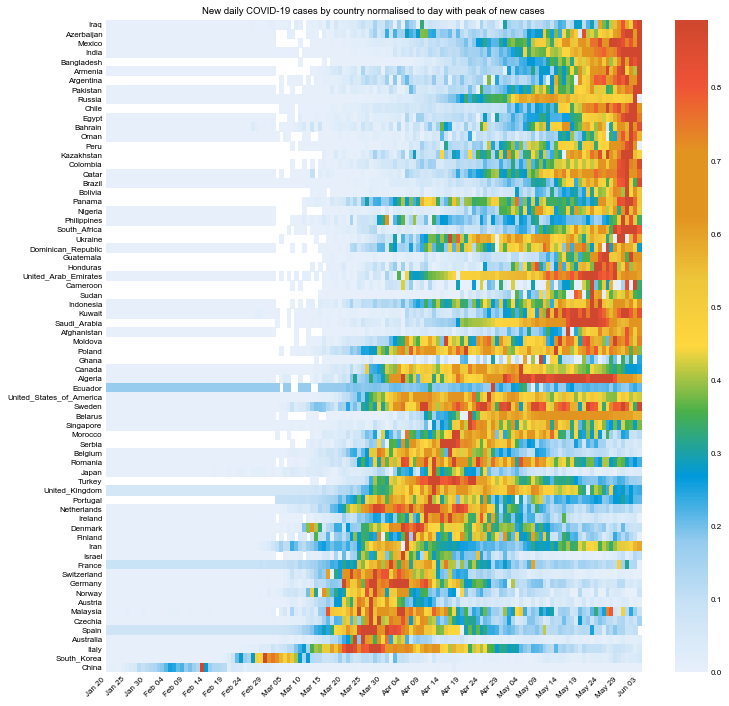

In [57]:
# Plot daily new cases as heatmap
rcParams['figure.figsize'] = 14, 14
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['xtick.major.size'] = False
rcParams['ytick.major.size'] = False

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(thresh_cases, cmap = custom_color_map, robust = True)
ax.set_xticks(date_ticks)
ax.set_xticklabels([labels[i].strftime('%b %d') for i in date_ticks], rotation=45, horizontalalignment='right' )

plt.title('New daily COVID-19 cases by country normalised to day with peak of new cases')

## 2. Comparison of increase and decrease of new COVID-19 cases per country by centering time lines on days with the peak in new cases 

In [58]:
# Transpose df so that countries are columns and dates are the index
lag = thresh_cases.T.copy()
lag.tail()

Iraq  Azerbaijan    Mexico     India  Bangladesh   Armenia  \
2020-05-30  0.801541    0.842491  0.829350  0.893927    0.866712  0.889749   
2020-05-31  0.589595    0.941392  0.741455  0.940622    0.605977  0.485493   
2020-06-01  0.500963    0.908425  0.810075  0.941969    0.874270  0.686654   
2020-06-02  0.826590    0.615385  0.712156  0.917162    0.817932  0.406190   
2020-06-03  1.000000    1.000000  1.000000  1.000000    1.000000  1.000000   

            Argentina  Pakistan    Russia     Chile  ...   Germany    Norway  \
2020-05-30   0.793142  0.597540  0.478936  0.675320  ...  0.117255  0.023529   
2020-05-31   0.879425  0.747601  0.500168  0.771298  ...  0.045440  0.000000   
2020-06-01   0.704646  0.729151  0.517823  0.882815  ...  0.052908  0.000000   
2020-06-02   0.623894  0.968758  1.000000  1.000000  ...  0.033842  0.000000   
2020-06-03   1.000000  1.000000  0.000000  0.644607  ...  0.054337  0.082353   

             Austria  Malaysia   Czechia     Spain  Australia     Italy  \
2020-05-30  0.044698  0.438298  0.137255  0.139175   0.037643  0.078695   
2020-05-31  0.038563  0.127660  0.083333  0.092379   0.019640  0.063444   
2020-06-01  0.003506  0.242553  0.105392  0.093188   0.016367  0.054141   
2020-06-02  0.018405  0.161702  0.071078  0.101779   0.014730  0.027147   
2020-06-03  0.009641  0.085106  0.151961       NaN   0.027823  0.048498   

            South_Korea     China  
2020-05-30     0.042904  0.001123  
2020-05-31     0.029703  0.000330  
2020-06-01     0.038504  0.001255  
2020-06-02     0.041804  0.000462  
2020-06-03     0.053905  0.000330  

[5 rows x 70 columns]

In [59]:
# Convert index into column
lag.reset_index(level=0, inplace=True)
# Delete index column
del lag['index']
lag.head()

Iraq  Azerbaijan  Mexico  India  Bangladesh  Armenia  Argentina  Pakistan  \
0   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   
1   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   
2   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   
3   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   
4   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   

   Russia  Chile  ...  Germany  Norway  Austria  Malaysia  Czechia     Spain  \
0     0.0    NaN  ...      0.0     0.0      0.0       0.0      0.0  0.072064   
1     0.0    NaN  ...      0.0     0.0      0.0       0.0      0.0  0.072064   
2     0.0    NaN  ...      0.0     0.0      0.0       0.0      0.0  0.072064   
3     0.0    NaN  ...      0.0     0.0      0.0       0.0      0.0  0.072064   
4     0.0    NaN  ...      0.0     0.0      0.0       0.0      0.0  0.072064   

   Australia  Italy  South_Korea     China  
0        0.0    0.0       0.0011  0.001255  
1        0.0    0.0       0.0000  0.009973  
2        0.0    0.0       0.0000  0.009246  
3        0.0    0.0       0.0000  0.006406  
4        0.0    0.0       0.0011  0.017106  

[5 rows x 70 columns]

In [60]:
# The country in the first column has the most recent date with highest number of new cases
# Get index of row with the highest value in the first column
max_shift = lag.iloc[:,0].idxmax()
max_shift

135

In [61]:
# The country in the last column is the first country that developed highest number of new cases
# Get index of row with the highest value in the last column
min_shift = lag.iloc[:,-1].idxmax()
min_shift

24

In [62]:
# Add additional rows to the end of the df to create space to shift into
lag = lag.reindex(lag.index.tolist() + list(range(len(lag.index), len(lag.index) + (max_shift - min_shift))))
lag.tail()

Iraq  Azerbaijan  Mexico  India  Bangladesh  Armenia  Argentina  \
242   NaN         NaN     NaN    NaN         NaN      NaN        NaN   
243   NaN         NaN     NaN    NaN         NaN      NaN        NaN   
244   NaN         NaN     NaN    NaN         NaN      NaN        NaN   
245   NaN         NaN     NaN    NaN         NaN      NaN        NaN   
246   NaN         NaN     NaN    NaN         NaN      NaN        NaN   

     Pakistan  Russia  Chile  ...  Germany  Norway  Austria  Malaysia  \
242       NaN     NaN    NaN  ...      NaN     NaN      NaN       NaN   
243       NaN     NaN    NaN  ...      NaN     NaN      NaN       NaN   
244       NaN     NaN    NaN  ...      NaN     NaN      NaN       NaN   
245       NaN     NaN    NaN  ...      NaN     NaN      NaN       NaN   
246       NaN     NaN    NaN  ...      NaN     NaN      NaN       NaN   

     Czechia  Spain  Australia  Italy  South_Korea  China  
242      NaN    NaN        NaN    NaN          NaN    NaN  
243      NaN    NaN        NaN    NaN          NaN    NaN  
244      NaN    NaN        NaN    NaN          NaN    NaN  
245      NaN    NaN        NaN    NaN          NaN    NaN  
246      NaN    NaN        NaN    NaN          NaN    NaN  

[5 rows x 70 columns]

In [63]:
# Shift columns so that dates with maximum value are in the same row
lag = lag.apply(lambda x: x.shift(max_shift - x.idxmax()))
lag.head()

Iraq  Azerbaijan  Mexico  India  Bangladesh  Armenia  Argentina  Pakistan  \
0   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   
1   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   
2   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   
3   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   
4   0.0         0.0     0.0    0.0         NaN      0.0        NaN       0.0   

   Russia  Chile  ...  Germany  Norway  Austria  Malaysia  Czechia  Spain  \
0     NaN    NaN  ...      NaN     NaN      NaN       NaN      NaN    NaN   
1     0.0    NaN  ...      NaN     NaN      NaN       NaN      NaN    NaN   
2     0.0    NaN  ...      NaN     NaN      NaN       NaN      NaN    NaN   
3     0.0    NaN  ...      NaN     NaN      NaN       NaN      NaN    NaN   
4     0.0    NaN  ...      NaN     NaN      NaN       NaN      NaN    NaN   

   Australia  Italy  South_Korea  China  
0        NaN    NaN          NaN    NaN  
1        NaN    NaN          NaN    NaN  
2        NaN    NaN          NaN    NaN  
3        NaN    NaN          NaN    NaN  
4        NaN    NaN          NaN    NaN  

[5 rows x 70 columns]

In [64]:
# Transpose df so that countries are in index
center_df = lag.T.copy()
center_df.head()

0    1    2    3    4    5    6    7    8    9    ...  237  238  \
Iraq        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
Azerbaijan  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
Mexico      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
India       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
Bangladesh  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

            239  240  241  242  243  244  245  246  
Iraq        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Azerbaijan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Mexico      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
India       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Bangladesh  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 247 columns]

Text(0.5, 1, 'New daily COVID-19 cases by country normalised to day with maximum number of new cases\nData centered on the day with peak new cases')

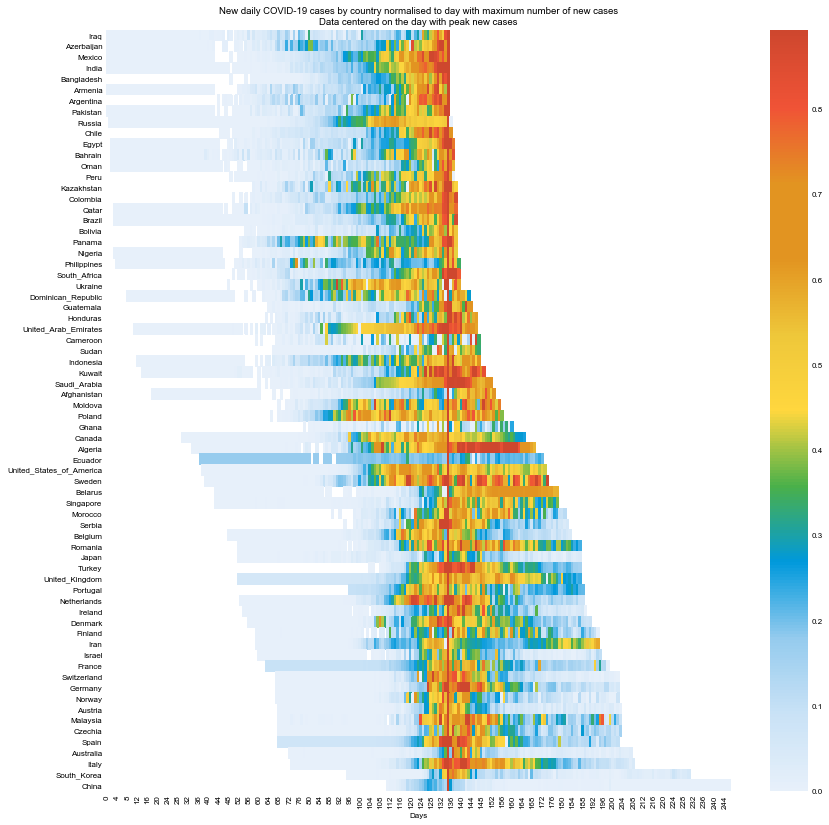

In [66]:
# Plot daily cases centered on the day with maximum number of new cases as heatmap
rcParams['figure.figsize'] = 14, 14
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['xtick.major.size'] = False
rcParams['ytick.major.size'] = False
ax = sns.heatmap(center_df, cmap = custom_color_map, robust = True)

ax.set_xlabel('Days')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.title('New daily COVID-19 cases by country normalised to day with maximum number of new cases\nData centered on the day with peak new cases')

The new plot better visualises the time frame until the number of daily new cases reached the maximum and how quickly the cases declined thereafter. It also shows whether there were high cases numbers detected before and after the peak and therefore how intense the virus ourtbreak was. From this one could make conclusions about the speed of each countries' reaction to the virus outbreak and the effectiveness of the measures introduced to limit the virus spread.

In this visulisation the countries are still in the order of the day with peak number of cases. To compare the decline of cases after the maximum between countries it would be maybe better to sort the countries on the overall number of cases in the tail after the maximum. Also, the days on the x-axis are continuously numbered from day 0 to the latest day of measurement. The time frames leading up to the peak and after the peak would be easier to follow
 if the peak was labelled as 0, the days before the peak counting backwards and the tail counting up.

In [67]:
# Get the names of the columns after the maximum
tail_col = center_df.iloc[:, int(max_shift + 1):].columns
tail_col

Int64Index([136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
            ...
            237, 238, 239, 240, 241, 242, 243, 244, 245, 246],
           dtype='int64', length=111)

In [68]:
# Create column with the row average of the the columns ofter the maximum
center_df['tail_mean'] = center_df.loc[:,tail_col].mean(axis = 1)
center_df.tail()

0   1   2   3   4   5   6   7   8   9  ...       238       239  \
Spain       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...       NaN       NaN   
Australia   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...       NaN       NaN   
Italy       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...       NaN       NaN   
South_Korea NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...       NaN       NaN   
China       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  0.000462  0.000066   

                  240  241       242      243       244       245      246  \
Spain             NaN  NaN       NaN      NaN       NaN       NaN      NaN   
Australia         NaN  NaN       NaN      NaN       NaN       NaN      NaN   
Italy             NaN  NaN       NaN      NaN       NaN       NaN      NaN   
South_Korea       NaN  NaN       NaN      NaN       NaN       NaN      NaN   
China        0.000198  0.0  0.001123  0.00033  0.001255  0.000462  0.00033   

             tail_mean  
Spain         0.319901  
Australia     0.125296  
Italy         0.375917  
South_Korea   0.100272  
China         0.014455  

[5 rows x 248 columns]

In [69]:
# Sort df decreasingly based on tail row average
center_df = center_df.sort_values(by=('tail_mean'), ascending=(False), na_position='first')
center_df.head()

0    1    2    3    4    5    6    7    8    9  ...  238  239  \
Iraq        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
Azerbaijan  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
Mexico      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
India       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
Bangladesh  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

            240  241  242  243  244  245  246  tail_mean  
Iraq        NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
Azerbaijan  NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
Mexico      NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
India       NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
Bangladesh  NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  

[5 rows x 248 columns]

In [70]:
# Delete tail_mean column
del center_df['tail_mean']
center_df.head()

0    1    2    3    4    5    6    7    8    9    ...  237  238  \
Iraq        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
Azerbaijan  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
Mexico      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
India       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN   
Bangladesh  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

            239  240  241  242  243  244  245  246  
Iraq        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Azerbaijan  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Mexico      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
India       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Bangladesh  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 247 columns]

In [71]:
# Rename columns so that peak column is named 0 with negative numbers before maximum and positive numbers after maximum
center_df.columns = list(range(-max_shift, (max_shift - min_shift) + 1))

Text(0.5, 1, 'New daily COVID-19 cases by country normalised to day with maximum number of new cases\nData centered on the day with peak new cases')

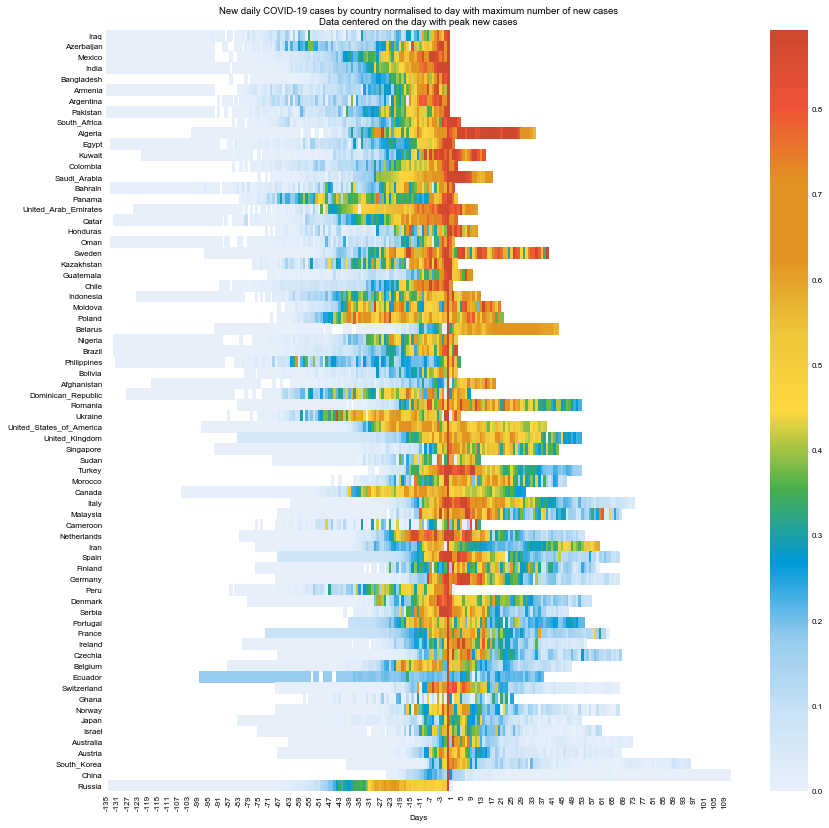

In [72]:
# Plot daily cases centered on the day with maximum number of new cases as heatmap
rcParams['figure.figsize'] = 14, 14
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['xtick.major.size'] = False
rcParams['ytick.major.size'] = False
ax = sns.heatmap(center_df, cmap = custom_color_map, robust = True)

ax.set_xlabel('Days')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.title('New daily COVID-19 cases by country normalised to day with maximum number of new cases\nData centered on the day with peak new cases')